In [1]:
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [4]:
import io
import pandas as pd
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')
df_movies = pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

In [5]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
df_tags.tail()
# df_tags.info()

,userId,movieId,tag,timestamp
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978
3682,610,168248,Heroic Bloodshed,1493844270


In [7]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
print(df_ratings.head())
print(df_ratings.info())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None


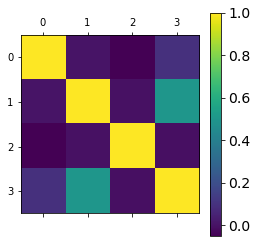

In [9]:

plt.matshow(df_ratings.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.plot(df_ratings.corr())
plt.show()

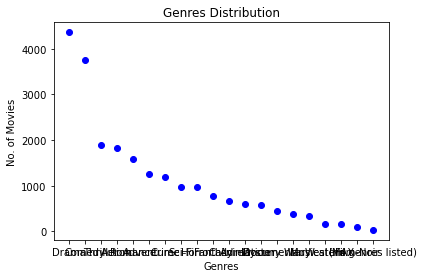

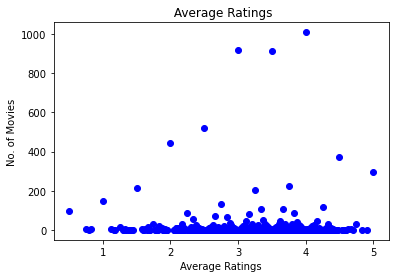

In [10]:
#EDA of movies file
# to get the movies in each genre
dfm = df_movies['genres'].apply(lambda genrelist : str(genrelist).split("|"))
dfm = pd.Series(dfm).apply(frozenset).to_frame(name='given_g')
for given_g in frozenset.union(*dfm.given_g):
    dfm[given_g] = dfm.apply(lambda _: int(given_g in _.given_g), axis=1)
dfm.drop('given_g',axis=1,inplace=True)
dfm['movieId']=df_movies['movieId']
dfm = pd.merge(df_movies,dfm,on='movieId')
genre_columns= ['Sci-Fi','Romance', 'Western','Animation', 'Comedy', 'Mystery', 'Documentary',  'Drama', 'IMAX','Thriller', 'Action', 'Musical',
       'War', 'Crime','Film-Noir', 'Children', 'Adventure', 'Horror',
       'Fantasy',  '(no genres listed)']
fig, ax = plt.subplots()
plt.plot(dfm[genre_columns].sum().sort_values(ascending=False),'bo')
plt.title("Genres Distribution")
ax.set_xlabel('Genres')
ax.set_ylabel('No. of Movies')
plt.show()


########
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data.head()

trend = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

fig, ax = plt.subplots()
plt.plot(trend['rating'].value_counts(),'bo')
plt.title(" Average Ratings")
ax.set_xlabel('Average Ratings')
ax.set_ylabel('No. of Movies')
plt.show()


Statistics of the data:
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09
Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes:

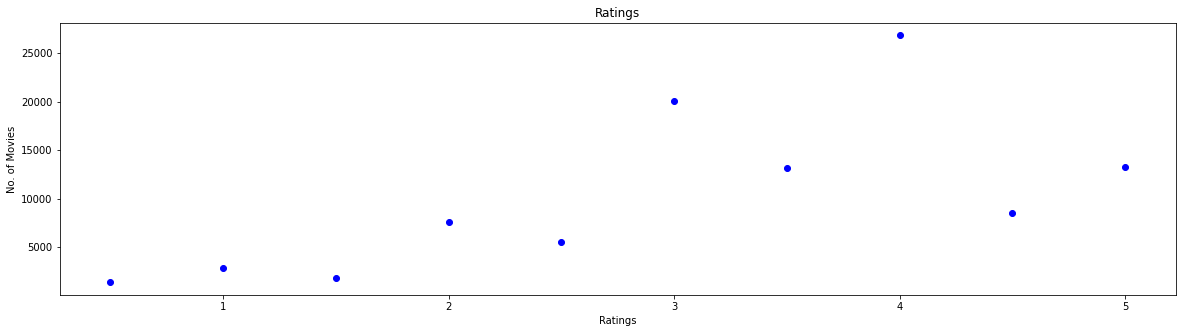

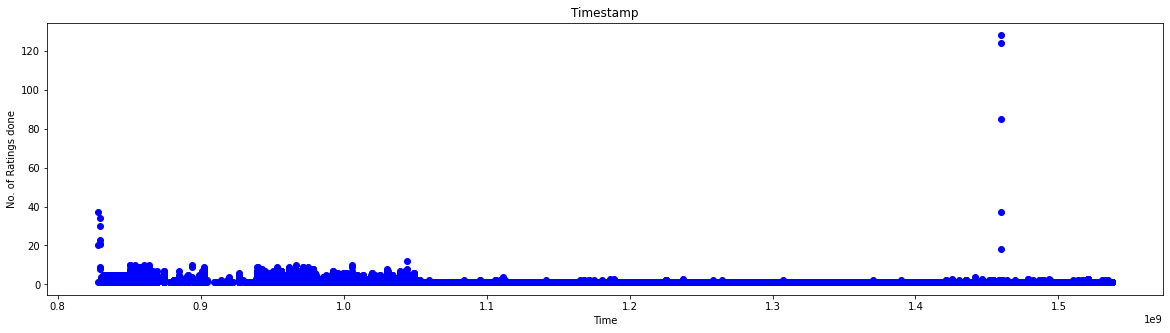

In [10]:
plt.rcParams["figure.figsize"] = (20,5)

# EDA of ratings file
print("Statistics of the data:")
print(df_ratings.describe())
print("Information about the data:")
print(df_ratings.info())

#plotting ratings and their frequency (to view trends in what ratings people gave)
fig, ax = plt.subplots()
plt.plot(df_ratings['rating'].value_counts(),'bo')
plt.title("Ratings")
ax.set_xlabel('Ratings')
ax.set_ylabel('No. of Movies')
plt.show()

#plotting times when people rated the movies (to view the trends in when people were rating movies)
fig, ax = plt.subplots()
plt.plot(df_ratings['timestamp'].value_counts(),'bo')
plt.title("Timestamp")
ax.set_xlabel('Time')
ax.set_ylabel('No. of Ratings done')
plt.show()

In [11]:
#create list of transactions, ie., the set of movies watched by every user
transactions = []
id = 1
i = 0
while i < df_ratings.shape[0]:
  movie_set = []
  while i < df_ratings.shape[0] and df_ratings.iloc[i]['userId'] == id:
    if df_ratings.iloc[i]['rating'] > 3:
      movie_set.append(int(df_ratings.iloc[i]['movieId']))
    i = i+1
  if(len(movie_set)>250):
    movie_set=movie_set[:250] 
  transactions.insert(id-1, movie_set)
  id = id+1

print(transactions)
print(len(transactions))

[[1, 3, 6, 47, 50, 101, 110, 151, 157, 163, 216, 231, 235, 260, 333, 349, 356, 362, 367, 441, 457, 480, 527, 543, 552, 553, 590, 592, 593, 596, 608, 661, 733, 804, 919, 923, 940, 943, 954, 1023, 1024, 1025, 1029, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1220, 1222, 1224, 1226, 1240, 1256, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1473, 1500, 1517, 1552, 1573, 1587, 1617, 1620, 1625, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2268, 2273, 2291, 2329, 2353, 2366, 2387, 2395, 2406, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2529, 2542, 2571, 2580, 2596, 2616, 2628, 2640, 2641, 2644, 2648, 2654, 2692, 2700, 2716, 2761, 2797, 2826, 2858, 2872, 2899, 2916, 2944, 2947, 2948, 2949, 2959, 2985, 2987, 2991, 2993, 2997, 3033, 3034, 3052, 3053, 3062, 3

In [12]:
pip install mlxtend==0.19.0

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax,association_rules,fpgrowth

# dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
#            ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
#            ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
#            ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
#            ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
from mlxtend.frequent_patterns import association_rules

df_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
df_rules

In [20]:
#create association rules only for transactions which contain the movies watched
movies_watched = [858]

def generate_rules(movies_watched):
  chosen_transactions = []
  for transaction in transactions:
    for movie in transaction:
      if movie in movies_watched:
        chosen_transactions.insert(len(chosen_transactions), transaction)
        break
  print(chosen_transactions)
  print(len(chosen_transactions))
  te = TransactionEncoder()
  te_ary = te.fit(chosen_transactions).transform(chosen_transactions)
  df = pd.DataFrame(te_ary, columns=te.columns_)

  frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

  df_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
  return df_rules

df_rules_2 = generate_rules(movies_watched)
df_rules_2

[[260, 296, 318, 356, 858, 1196, 1201, 1206, 1210, 1240, 1732, 2571, 5618, 5952, 6350, 7099], [10, 11, 16, 22, 50, 150, 223, 253, 260, 288, 296, 333, 356, 550, 553, 555, 593, 597, 648, 805, 858, 912, 924, 1060, 1089, 1090, 1093, 1101, 1124, 1197, 1210, 1213, 1221, 1222, 1231, 1245, 1246, 1265, 1378, 1379, 1500, 1517, 1653, 1673, 1704, 1722, 1784, 2000, 2023, 2028, 2081, 2278, 2329, 2371, 2372, 2376, 2423, 2478, 2502, 2541, 2571, 2706, 2712, 2763, 2791, 2871, 2989, 2990, 3082, 3100, 3448, 3450, 3502, 3755, 3841, 4002, 4007, 4034, 4041, 4102, 4262, 4321, 4351, 4482, 4489, 4509, 4564], [50, 104, 110, 150, 165, 216, 223, 231, 260, 296, 356, 362, 364, 474, 543, 588, 589, 595, 858, 1035, 1059, 1060, 1097, 1136, 1196, 1197, 1210, 1213, 1242, 1246, 1258, 1282, 1291, 1302, 1372, 1393, 1517, 1573, 1584, 1704, 1732, 1866, 1921, 1923, 2006, 2028, 2078, 2081, 2083, 2106, 2231, 2268, 2324, 2329, 2355, 2431, 2502, 2571, 2580, 2657, 2694, 2700, 2762, 2771, 2858, 2890, 2918, 2959, 3114, 3147, 3552, 357

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(858),0.136364,1.000000,0.136364,1.000000,1.000000,0.000000,inf
1,(6),(858),0.102273,1.000000,0.102273,1.000000,1.000000,0.000000,inf
2,(296),(32),0.477273,0.102273,0.102273,0.214286,2.095238,0.053461,1.142562
3,(32),(296),0.102273,0.477273,0.102273,1.000000,2.095238,0.053461,inf
4,(32),(858),0.102273,1.000000,0.102273,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
7734,(4993),"(260, 296, 2571, 1196, 858)",0.238636,0.147727,0.102273,0.428571,2.901099,0.067020,1.491477
7735,(260),"(4993, 296, 2571, 1196, 858)",0.375000,0.102273,0.102273,0.272727,2.666667,0.063920,1.234375
7736,(296),"(4993, 260, 2571, 1196, 858)",0.477273,0.113636,0.102273,0.214286,1.885714,0.048037,1.128099
7737,(2571),"(4993, 260, 296, 1196, 858)",0.386364,0.102273,0.102273,0.264706,2.588235,0.062758,1.220909


In [22]:
#predict based on input
import copy, operator
movies_watched = [49280]

def recommend_movies(movies_watched, df_rules):
  relations = {}
  #find all relations where a subset of movies_watched is present in the antecedents
  for i in range(0, df_rules.shape[0]):
    num_matches = 0
    for j in range(0, len(movies_watched)):
      if movies_watched[j] in df_rules.iloc[i]['antecedents']:
        num_matches = num_matches + 1
    if num_matches > 0:
      if num_matches not in relations:
        relations[num_matches] = [i]
      else:
        relations[num_matches].append(i)

  print("All relations - ", relations)
  print("Count relations - ", len(relations))
  #rule 1 - find relations with maximum number of matches
  max_matches = max(relations.keys())

  #rule 2 - find top 10 relations with maximum support
  max_support_indices = {}
  for i in relations[max_matches]:
    if len(max_support_indices) < 10:
      max_support_indices[df_rules.iloc[i]['support']] = i

    elif df_rules.iloc[i]['support'] > min(max_support_indices.keys()):
      max_support_indices.pop(min(max_support_indices.keys()))
      max_support_indices[df_rules.iloc[i]['support']] = i

  print("Top 10 max support indices - ", max_support_indices)

  for x in max_support_indices:
    print("Movies - ", df_rules.iloc[max_support_indices[x]]['consequents'])

  support_indices_copy = copy.deepcopy(max_support_indices)

  recommendations = {}
  while len(recommendations) < 4:
    max_support = max(support_indices_copy.keys())
    support_indices_copy.pop(max_support)
    consequents = list(df_rules.iloc[max_support_indices[max_support]]['consequents'])
    for x in consequents:
      if x not in recommendations:
        recommendations[x] = 1
      else:
        recommendations[x] = recommendations[x] + 1

  print("Recommendations after rule 2 - ", recommendations)

  #rule 3 - sort by frequency of occurence of a movie in consequents
  while len(recommendations) > 4: 
    min_count = min(recommendations.values())
    min_keys = list([key for key in recommendations if recommendations[key] == min_count])
    i = 0
    while len(recommendations) > 4 and i < len(min_keys):
      recommendations.pop(min_key[i])

  return list(recommendations.keys())

recommendations = recommend_movies(movies_watched, df_rules_2)
print(recommendations)

All relations -  {}
Count relations -  0


ValueError: ignored

In [ ]:
#attempt 2
#predict based on input
import copy, operator
movies_watched = [858]

def recommend_movies(movies_watched, df_rules):
  relations = {}
  #find all relations where a subset of movies_watched is present in the antecedents
  for i in range(0, df_rules.shape[0]):
    num_matches = 0
    for j in range(0, len(movies_watched)):
      if movies_watched[j] in df_rules.iloc[i]['antecedents']:
        num_matches = num_matches + 1
    if num_matches > 0:
      if num_matches not in relations:
        relations[num_matches] = [i]
      else:
        relations[num_matches].append(i)

  print("All relations - ", relations)
  print("Count relations - ", len(relations))
  #rule 1 - find relations with maximum number of matches
  max_matches = max(relations.keys())

  #rule 2 - find top 10 relations with maximum support
  max_support_indices = {}
  for i in relations[max_matches]:
    if len(max_support_indices) < 10:
      max_support_indices[df_rules.iloc[i]['support']] = i

    elif df_rules.iloc[i]['support'] > min(max_support_indices.keys()):
      max_support_indices.pop(min(max_support_indices.keys()))
      max_support_indices[df_rules.iloc[i]['support']] = i

  print("Top 10 max support indices - ", max_support_indices)

  for x in max_support_indices:
    print("Movies - ", df_rules.iloc[max_support_indices[x]]['consequents'])

  support_indices_copy = copy.deepcopy(max_support_indices)

  recommendations = {}
  while len(recommendations) < 4:
    max_support = max(support_indices_copy.keys())
    support_indices_copy.pop(max_support)
    consequents = list(df_rules.iloc[max_support_indices[max_support]]['consequents'])
    for x in consequents:
      if x not in recommendations:
        recommendations[x] = [1, max_support_indices[max_support]]
      else:
        recommendations[x][0] = recommendations[x][0] + 1

  print("Recommendations after rule 2 - ", recommendations)

  #rule 3 - sort by confidence of relations
  max_confidence_movies = {}
  for i in recommendations:
    if len(max_confidence_movies) < 4:
      max_confidence_movies[df_rules.iloc[recommendations[i][1]]['confidence']] = i

    elif df_rules.iloc[recommendations[i][1]]['confidence'] > min(max_confidence_movies.keys()):
      max_confidence_movies.pop(min(max_confidence_movies.keys()))
      max_confidence_movies[df_rules.iloc[recommendations[i][1]]['confidence']] = i

  return list(recommendations.keys())

recommendations = recommend_movies(movies_watched, df_rules_2)
print(recommendations)

All relations -  {1: [19, 49, 85, 143, 238, 278, 295, 342, 366, 393, 410, 413, 420, 424, 426, 427, 430, 440, 442, 443, 447, 471, 477, 483, 485, 495, 790, 791, 794, 796, 799, 801, 811, 812, 840, 841, 868, 870, 874, 875, 879, 880, 884, 885, 888, 890, 893, 895, 899, 900, 904, 905, 909, 910, 913, 915, 924, 925, 935, 936, 940, 941, 963, 965, 986, 987, 997, 999, 1020, 1021, 1025, 1027, 1030, 1032, 1035, 1036, 1040, 1042, 1045, 1047, 1050, 1051, 1055, 1056, 1060, 1062, 1089, 1091, 1093, 1167, 1168, 1184, 1185, 1201, 1203, 1206, 1207, 1217, 1218, 1252, 1254, 1257, 1259, 1268, 1270, 1273, 1275, 1278, 1280, 1284, 1285, 1288, 1289, 1290, 1294, 1296, 1300, 1301, 1304, 1305, 1309, 1310, 1312, 1315, 1316, 1320, 1321, 1325, 1326, 1330, 1332, 1335, 1336, 1338, 1342, 1343, 1346, 1347, 1351, 1353, 1356, 1358, 1505, 1507, 1509, 1565, 1567, 1570, 1572, 1575, 1577, 1580, 1582, 1586, 1587, 1590, 1603, 1605, 1607, 1645, 1647, 1650, 1652, 1667, 1669, 1672, 1674, 1677, 1679, 1682, 1684, 1687, 1689, 1693, 1694,

In [ ]:
from mlxtend.frequent_patterns import fpmax

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = fpmax(df, min_support=0.04, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.040984,(4878)
1,0.040984,(4011)
2,0.040984,(68954)
3,0.040984,(1617)
4,0.040984,(1225)
...,...,...
114,0.050820,"(2571, 356)"
115,0.063934,"(296, 2571)"
116,0.068852,"(2571, 318)"
117,0.055738,"(296, 356)"


In [ ]:
#create list of transactions, ie., the set of movies watched by every user
transactions = []
id = 1
i = 0
while i < df_tags.shape[0]:
  movie_set = []
  last=0
  while i < df_tags.shape[0] and df_tags.iloc[i]['userId'] == id:
    if int(df_tags.iloc[i]['movieId']) == last:
      i=i+1
    else:
      movie_set.append(int(df_tags.iloc[i]['movieId']))
      last = int(df_tags.iloc[i]['movieId'])
      i = i+1
  if(len(movie_set)>250):
    movie_set=movie_set[:250]
  if (len(movie_set)>1): 
    transactions.insert(id-1, movie_set)
  id = id+1

print(transactions)
print(len(transactions))

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.04, use_colnames=True)
from mlxtend.frequent_patterns import association_rules

# df_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
# df_rules

In [ ]:
df_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)
df_rules

In [ ]:
# input based transaction selections